<a href="https://colab.research.google.com/github/Hary2003/machinelearning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
len(X_test)

10000

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
              )
model.fit(X_train_flattened,Y_train, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8160 - loss: 0.7132
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9200 - loss: 0.2823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9228 - loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9268 - loss: 0.2653


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.3019


[0.2688317596912384, 0.9254000186920166]

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.1317984e-01, 5.8135455e-03, 9.9922633e-01, 3.8636988e-01,
       8.3805723e-10, 8.7494183e-01, 8.6482829e-01, 1.2644433e-12,
       2.1204981e-01, 3.2047496e-09], dtype=float32)

In [ ]:
np.argmax(Y_predicted[1])

np.int64(2)

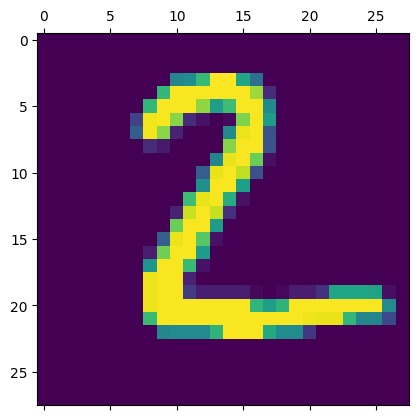

In [ ]:
plt.matshow(X_test[1])

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(100,input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax')]
    )


model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
              )
model.fit(X_train_flattened,Y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.4557
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9610 - loss: 0.1317
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9746 - loss: 0.0850
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0505


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


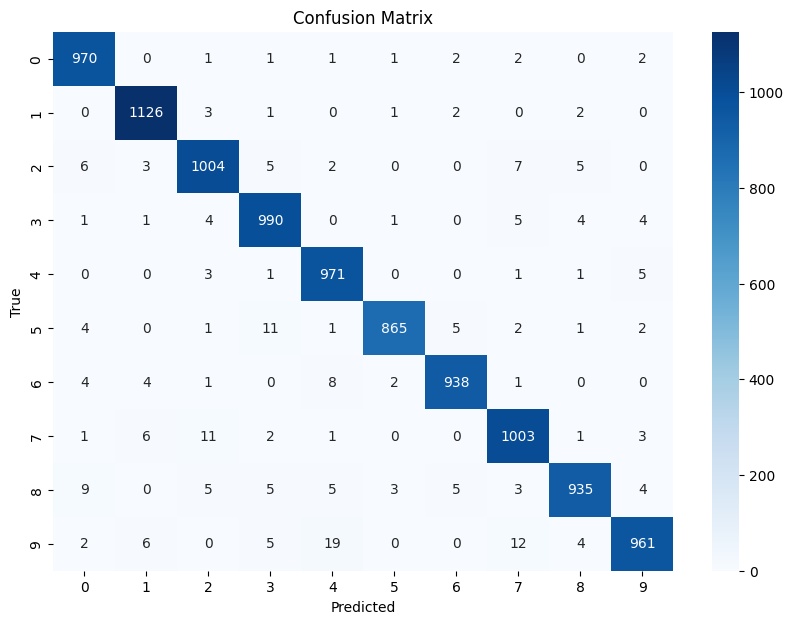

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels
Y_pred_labels = np.argmax(model.predict(X_test_flattened), axis=1)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred_labels)

# Plot it using seaborn heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, Y_pred_labels))


Accuracy: 0.9763
